# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
no_cities = len(cities)
no_cities

628

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Develop the url
base_url = "https://api.openweathermap.org/data/2.5/weather?"
unit = 'imperial'
api_key = weather_api_key

# Create empty list to hold the data
city_name = []
latitude = []
longitude = []
max_temp = []
humidity = []
cloudiness = []
wind_spd = []
country = []
date = []

# At the beginning, data retrieved equals 0
record = 0

# Print beginning log statement
print(f'Beginning Data Retrieval')     
print('-----------------------------')
    
# Apply for loop  to retrive the data
for city in cities:
    
    # Develop query url
    query_url = base_url + 'q=' + city + '&appid=' + api_key + '&units=' + unit
    
    # Exception Handling
    try:
        # Retrieving data and converting it into JSON
        weather_data = requests.get(query_url).json()
        
        # Get data form JSON 
        name = weather_data['name']
        city_name.append(name)
        lat = weather_data['coord']['lat']
        latitude.append(lat)
        lon = weather_data['coord']['lon']
        longitude.append(lon)
        mtemp = weather_data['main']['temp_max']
        max_temp.append(mtemp)
        hmd = weather_data['main']['humidity']
        humidity.append(hmd)
        clouds = weather_data['clouds']['all']
        cloudiness.append(clouds)
        windsp = weather_data['wind']['speed']
        wind_spd.append(windsp)
        cnt = weather_data['sys']['country']
        country.append(cnt)
        d = weather_data['dt']
        date.append(d)
        
        # Plus 1 for the successful data retrived      
        record += 1
        
        # Print log statement for successful data retrived
        print(f'Processing Record {record} of {no_cities} | {city}')
        
    except:
        # Print log statement for unsuccessful data retrived
        print(f'City not found | {city}')
        
# Print ending log statement
print(f"-------------------------------")
print(f"Data Retrieval Complete")
print(f"-------------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 1 of 628 | ushuaia
Processing Record 2 of 628 | chokurdakh
Processing Record 3 of 628 | khor
Processing Record 4 of 628 | cherskiy
Processing Record 5 of 628 | araouane
Processing Record 6 of 628 | rikitea
Processing Record 7 of 628 | iqaluit
Processing Record 8 of 628 | saint-francois
Processing Record 9 of 628 | cape town
Processing Record 10 of 628 | maun
Processing Record 11 of 628 | salalah
Processing Record 12 of 628 | carnarvon
Processing Record 13 of 628 | souillac
Processing Record 14 of 628 | port hedland
Processing Record 15 of 628 | zhigansk
Processing Record 16 of 628 | victoria
Processing Record 17 of 628 | merauke
Processing Record 18 of 628 | punta arenas
Processing Record 19 of 628 | vaini
Processing Record 20 of 628 | tasiilaq
Processing Record 21 of 628 | gat
Processing Record 22 of 628 | kon tum
Processing Record 23 of 628 | norman wells
Processing Record 24 of 628 | tambura
Processing Record 2

Processing Record 195 of 628 | asau
Processing Record 196 of 628 | brownsville
Processing Record 197 of 628 | kwinana
Processing Record 198 of 628 | ahipara
Processing Record 199 of 628 | sesheke
Processing Record 200 of 628 | beloha
Processing Record 201 of 628 | yulara
Processing Record 202 of 628 | mount isa
Processing Record 203 of 628 | san cristobal
Processing Record 204 of 628 | anton lizardo
City not found | vaitupu
Processing Record 205 of 628 | kungurtug
Processing Record 206 of 628 | luderitz
Processing Record 207 of 628 | dyurtyuli
Processing Record 208 of 628 | iralaya
City not found | samusu
Processing Record 209 of 628 | forestville
Processing Record 210 of 628 | kandri
Processing Record 211 of 628 | key west
Processing Record 212 of 628 | vestmannaeyjar
Processing Record 213 of 628 | kodiak
Processing Record 214 of 628 | nyagan
Processing Record 215 of 628 | guerrero negro
Processing Record 216 of 628 | petropavlovsk-kamchatskiy
Processing Record 217 of 628 | krasnovish

Processing Record 386 of 628 | atambua
Processing Record 387 of 628 | bambous virieux
Processing Record 388 of 628 | makakilo city
Processing Record 389 of 628 | saint-philippe
Processing Record 390 of 628 | morro bay
Processing Record 391 of 628 | vostok
Processing Record 392 of 628 | byron bay
Processing Record 393 of 628 | tibati
Processing Record 394 of 628 | gambela
Processing Record 395 of 628 | kalangala
Processing Record 396 of 628 | mao
Processing Record 397 of 628 | bonavista
Processing Record 398 of 628 | aykhal
Processing Record 399 of 628 | san andres
Processing Record 400 of 628 | gweru
Processing Record 401 of 628 | reconquista
Processing Record 402 of 628 | annapolis
Processing Record 403 of 628 | sereflikochisar
Processing Record 404 of 628 | rocha
Processing Record 405 of 628 | yabrud
Processing Record 406 of 628 | awjilah
Processing Record 407 of 628 | uglegorsk
Processing Record 408 of 628 | dunedin
Processing Record 409 of 628 | montevarchi
Processing Record 410 of

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
weather_data_df = pd.DataFrame({
    'City' : city_name,
    'Latitude' : latitude,
    'Longitude' : longitude,
    'Max Temp' : max_temp,
    'Humidity' : humidity,
    'Cloudiness' : cloudiness,
    'Wind Speed' : wind_spd,
    'Country' : country,
    'Date' : date
})

weather_data_df.head()

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ushuaia,-54.80,-68.30,39.20,69,40,27.51,AR,1602018383
1,Chokurdakh,70.63,147.92,27.55,89,100,13.60,RU,1602017866
2,Khor,47.89,134.95,38.80,93,50,8.16,RU,1602018384
3,Cherskiy,68.75,161.30,26.44,91,13,1.74,RU,1602017875
4,Araouane,18.90,-3.53,97.02,19,12,10.98,ML,1602018384


In [5]:
weather_data_df.describe()

,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000,5.810000e+02
mean,18.343614,23.056127,63.683546,71.254733,50.631670,8.175749,1.602018e+09
std,33.858695,90.174835,18.327300,22.271379,40.165201,5.634435,2.679134e+02
min,-54.800000,-175.200000,11.680000,7.000000,0.000000,0.540000,1.602018e+09
25%,-10.170000,-58.740000,51.800000,59.000000,5.000000,4.030000,1.602018e+09
50%,21.400000,26.880000,67.330000,78.000000,51.000000,6.930000,1.602018e+09
75%,46.430000,103.940000,77.360000,88.000000,90.000000,11.180000,1.602018e+09
max,78.220000,179.320000,103.690000,100.000000,100.000000,44.960000,1.602019e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
#  Get the indices of cities that have humidity over 100%.
humidity_over_hundred = weather_data_df[weather_data_df.loc[weather_data_df['Humidity'] > 100]]
no_cities_humd = humidity_over_hundred['City'].count()

In [9]:
if no_cities_humd == 0:
    print(f'There are no cities that have humidity over 100%')
else:
    weather_data_df = weather_data_df.drop[humidity_over_hundred.index, inplace:False]

There are no cities that have humidity over 100%


In [10]:
weather_data_csv = weather_data_df.to_csv(output_data_file)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [11]:
import time
# Read the csv file
weather_data_df = pd.read_csv(output_data_file)
time = time.localtime(weather_data_df['Date'][0])
date = f'{time.tm_year}-{time.tm_mon}-{time.tm_mday}'

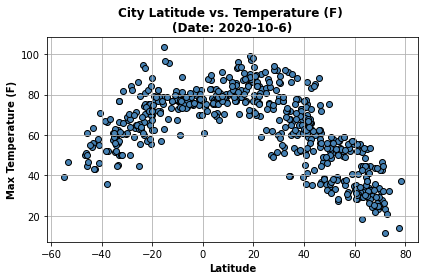

In [12]:
# Create scatter plot between Latitude and Max Temperature
lat_temp = plt.scatter(weather_data_df['Latitude'], 
                       weather_data_df['Max Temp'], 
                       marker='o', 
                       color='steelblue', 
                       edgecolor='black')

# Add title&labels and modify plot&layout
plt.title(f'City Latitude vs. Temperature (F) \n(Date: {date})', fontweight='bold')
plt.xlabel('Latitude', fontweight='bold')
plt.ylabel('Max Temperature (F)', fontweight='bold')
plt.grid()
plt.tight_layout()

# Save figure and show the the plot
plt.savefig('Images/lat_temp.png')
plt.show()

## Latitude vs. Humidity Plot

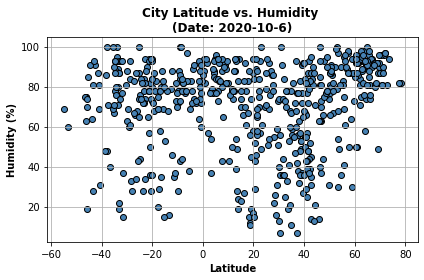

In [13]:
# Create scatter plot between Latitude and Max Temperature
lat_temp = plt.scatter(weather_data_df['Latitude'], 
                       weather_data_df['Humidity'], 
                       marker='o', 
                       color='steelblue', 
                       edgecolor='black')

# Add title&labels and modify plot&layout
plt.title(f'City Latitude vs. Humidity \n(Date: {date})', fontweight='bold')
plt.xlabel('Latitude', fontweight='bold')
plt.ylabel('Humidity (%)', fontweight='bold')
plt.grid()
plt.tight_layout()

# Save figure and show the the plot
plt.savefig('Images/lat_humd.png')
plt.show()

## Latitude vs. Cloudiness Plot

## Latitude vs. Wind Speed Plot

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression